# Executive Approval

Data from http://www.executiveapproval.org/

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
df = pd.read_csv("executive-approval/EAD+2.0+quarter+101019.csv")
df.head()

,Country,ccode,qtr,Approval_Smoothed,Approval_Not_Smoothed,NET_Smoothed,NET_Not_Smoothed,Relative_Smoothed,Relative_Not_Smoothed,year,quarter
0,Argentina,Argentina,1983q4,72.091103,71.724472,NaN,NaN,NaN,NaN,1983,4
1,Argentina,Argentina,1984q1,70.882217,70.464142,NaN,NaN,NaN,NaN,1984,1
2,Argentina,Argentina,1984q2,70.821960,70.464142,42.275131,42.119450,71.780296,71.701630,1984,2
3,Argentina,Argentina,1984q3,66.174660,65.628357,36.499939,36.475658,70.568192,70.514793,1984,3
4,Argentina,Argentina,1984q4,62.809601,61.916641,31.915319,31.003420,69.593399,69.370468,1984,4


In [37]:
# to_datetime automatically understands quarters,
# but if you give it a format it breaks!
df['Date'] = pd.to_datetime(df.qtr)
df.head()

,Country,ccode,qtr,Approval_Smoothed,Approval_Not_Smoothed,NET_Smoothed,NET_Not_Smoothed,Relative_Smoothed,Relative_Not_Smoothed,year,quarter,Date
0,Argentina,Argentina,1983q4,72.091103,71.724472,NaN,NaN,NaN,NaN,1983,4,1983-10-01
1,Argentina,Argentina,1984q1,70.882217,70.464142,NaN,NaN,NaN,NaN,1984,1,1984-01-01
2,Argentina,Argentina,1984q2,70.821960,70.464142,42.275131,42.119450,71.780296,71.701630,1984,2,1984-04-01
3,Argentina,Argentina,1984q3,66.174660,65.628357,36.499939,36.475658,70.568192,70.514793,1984,3,1984-07-01
4,Argentina,Argentina,1984q4,62.809601,61.916641,31.915319,31.003420,69.593399,69.370468,1984,4,1984-10-01


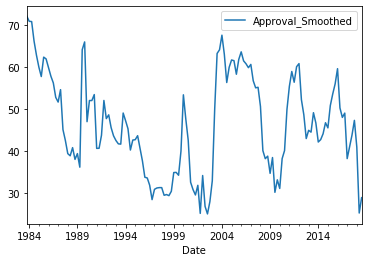

In [38]:
argentina = df[df.Country == 'Argentina']
argentina.plot(x='Date', y='Approval_Smoothed')

In [52]:
export = argentina[['Date', 'Approval_Smoothed']]
export.head()

,Date,Approval_Smoothed
0,1983-10-01,72.091103
1,1984-01-01,70.882217
2,1984-04-01,70.821960
3,1984-07-01,66.174660
4,1984-10-01,62.809601


You can use `.to_clipboard()` and paste this into [DataWrapper](https://www.datawrapper.de/), but be sure to select the index and select "Hide column" or else you'll get an extra line you don't want.

In [53]:
export.to_clipboard()

Put it into DataWrapper, work some magic, and then you have [a nice little chart](https://datawrapper.dwcdn.net/zuCtR/1/)

# Maybe I want multiple countries

Country
Argentina    AxesSubplot(0.125,0.125;0.775x0.755)
Brazil       AxesSubplot(0.125,0.125;0.775x0.755)
Chile        AxesSubplot(0.125,0.125;0.775x0.755)
Peru         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

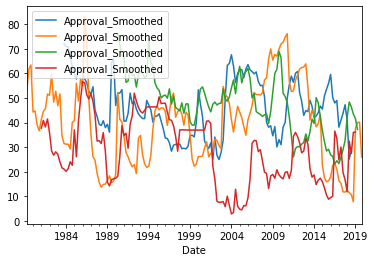

In [39]:
fig, ax = plt.subplots()

selected = df[df.Country.isin(['Argentina', 'Chile', 'Peru', 'Brazil'])]
selected.groupby(by='Country').plot(x='Date', y='Approval_Smoothed', ax=ax)

# Prepare for pasting to DataWrapper

Let's take a look at it...

In [40]:
selected.head()

,Country,ccode,qtr,Approval_Smoothed,Approval_Not_Smoothed,NET_Smoothed,NET_Not_Smoothed,Relative_Smoothed,Relative_Not_Smoothed,year,quarter,Date
0,Argentina,Argentina,1983q4,72.091103,71.724472,NaN,NaN,NaN,NaN,1983,4,1983-10-01
1,Argentina,Argentina,1984q1,70.882217,70.464142,NaN,NaN,NaN,NaN,1984,1,1984-01-01
2,Argentina,Argentina,1984q2,70.821960,70.464142,42.275131,42.119450,71.780296,71.701630,1984,2,1984-04-01
3,Argentina,Argentina,1984q3,66.174660,65.628357,36.499939,36.475658,70.568192,70.514793,1984,3,1984-07-01
4,Argentina,Argentina,1984q4,62.809601,61.916641,31.915319,31.003420,69.593399,69.370468,1984,4,1984-10-01


Only keep the important columns

In [41]:
selected = selected[['Country', 'Approval_Smoothed', 'Date']]
selected.head()

,Country,Approval_Smoothed,Date
0,Argentina,72.091103,1983-10-01
1,Argentina,70.882217,1984-01-01
2,Argentina,70.821960,1984-04-01
3,Argentina,66.174660,1984-07-01
4,Argentina,62.809601,1984-10-01


## Reshaping our data for DataWrapper

To make a line chart, DataWrapper wants each row to be a date, and each column to be a line. That means we need to reshape our data a bit.

In [43]:
wide = selected.pivot(index='Date', columns='Country', values='Approval_Smoothed')
wide.head(20)

Country,Argentina,Brazil,Chile,Peru
Date,,,,
1979-04-01,NaN,53.139702,NaN,NaN
1979-07-01,NaN,61.809139,NaN,NaN
1979-10-01,NaN,63.436790,NaN,NaN
1980-01-01,NaN,44.296379,NaN,NaN
1980-04-01,NaN,44.756180,NaN,NaN
1980-07-01,NaN,39.011189,NaN,NaN
1980-10-01,NaN,36.644360,NaN,NaN
1981-01-01,NaN,41.279140,NaN,37.768028
1981-04-01,NaN,44.524052,NaN,40.916401


Filter for after 1990.

In [49]:
after_1991 = wide.loc['1991-01-01':]
after_1991.head()

Country,Argentina,Brazil,Chile,Peru
Date,,,,
1991-01-01,40.599251,34.551819,66.834801,34.715939
1991-04-01,40.622959,27.846510,56.357182,35.675179
1991-07-01,43.728390,26.098841,56.946789,29.598869
1991-10-01,52.017941,23.827440,61.545410,39.368179
1992-01-01,47.695629,22.026260,59.201012,42.728859


Then move it to our clipboard.

In [50]:
after_1991.to_clipboard()

Then you spend some time editing it on [datawrapper.de](datawrapper.de), and eventually you get a nice [embeddable graphic](https://datawrapper.dwcdn.net/vCoo9/1/)